<a href="https://colab.research.google.com/github/Ganeshbhavale/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Bike Sharing Demand Prediction**



##### **Project Type**    - Linear Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Ganesh Bhavale
##### **Team Member 2 -** Akshay Ghuge



# **Project Summary**

The bike rental count prediction project addresses the pressing challenge of accurately forecasting demand for bike ride-sharing services in urban settings. This initiative combines historical bike usage patterns with weather data to construct predictive models that can provide precise forecasts. The dataset encompasses eight crucial input variables, including date, seasons, holidays, temperature, humidity, and more. To tackle this complex problem, the project employs a suite of Python libraries such as Pandas, Seaborn, NumPy, and scikit-learn.

The project proceeds through a series of meticulously orchestrated steps. First, data wrangling and cleaning are performed to ensure data integrity and consistency. This includes handling missing values, addressing outliers, and preparing the dataset for analysis. Subsequently, an exploratory data analysis (EDA) phase provides critical insights into the dataset's patterns and relationships between variables. Visualizations and statistical analysis aid in understanding the data's nuances.

Feature engineering follows, where new features are created or existing ones are modified to enhance model predictability. This includes encoding categorical data, transforming variables, and preparing datetime features for modeling. To enhance model stability, outliers are identified and removed from the dataset. Data transformation, such as scaling and normalization, ensures variables are on a similar scale and suitable for modeling. Categorical variables are encoded into numerical format, using techniques like one-hot encoding or label encoding, to make them compatible with machine learning models. Scaling techniques, such as Min-Max scaling or Z-score scaling, are applied to ensure that no single feature dominates the modeling process. Multicollinearity, a situation where independent variables are highly correlated, is identified and addressed to ensure model interpretability and stability.

The heart of the project lies in the application of various machine learning algorithms, including linear regression, decision trees, random forests and gradient boosting. Each model is meticulously trained and evaluated using appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

The critical juncture arrives when the best-performing model is selected based on its performance metrics. This model, capable of generating precise demand predictions, holds significant implications for the bike ride-sharing industry. It empowers ride-sharing companies to optimize their resource allocation, reduce costs, and enhance customer satisfaction. Moreover, by aligning bike availability with weather conditions, the project promotes eco-friendly transportation choices, mitigating traffic congestion and carbon emissions.

In essence, this project represents the convergence of data science, technology, and urban planning, contributing to the evolution of efficient, sustainable, and customer-centric urban mobility. It underscores the power of data-driven decision-making and innovation in shaping the future of urban transportation.


# **GitHub Link -**

# **Problem Statement**


Bike rentals have been implemented in numerous urban areas to improve the convenience of urban mobility. Ensuring that rental bikes are readily available and easily accessible to the public is essential for reducing waiting times. Consequently, ensuring a consistent supply of rental bikes to the city becomes a significant priority. The pivotal aspect of achieving this is accurately predicting the required bike count for each hour to maintain a stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

# import all libraries related to ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

### Dataset Loading

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path='/content/drive/MyDrive/Regression project bike sharing demand/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')

### Dataset First View

In [8]:
# Dataset First Look
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017,01/12/2017
Rented Bike Count,254,204,173,107,78,100,181,460,930,490
Hour,0,1,2,3,4,5,6,7,8,9
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0,-6.4,-6.6,-7.4,-7.6,-6.5
Humidity(%),37,38,39,40,36,37,35,38,37,27
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3,1.5,1.3,0.9,1.1,0.5
Visibility (10m),2000,2000,2000,2000,2000,2000,2000,2000,2000,1928
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6,-18.7,-19.5,-19.3,-19.8,-22.4
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.23
Rainfall(mm),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

- There are 8760 rows and 14 columns.

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

- There are 4 object type variables which need to be converted to numerical data type for applying machine learning algorithm.

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

**There is no duplicate row.**

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There is no missing value.**

### What did you know about your dataset?

- Dependent variable is Rented bike count.
- Number of rows is 8760 and Number of columns is 14.
- No missing values in any column and No duplicated values.
- There are 4 object type variables and other are numerical type variable.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Mean value of visibility is more than than mean value of other numerical features so the data set need to normalised.

### Variables Description

- **Date**: Current date
- **Rented Bike Count**: (Dependent variable), No. of rented bike count.
- **Hour**: Hour of the day in 24hr format.
- **Temperature(°C)**: (Numerical) Temperature at the time of booking in °C.
- **Humidity(%)**: Humidity in (%).
- **Wind speed (m/s)**: (Numerical) Wind speed in (m/s).
- **Visibility (10m)**: (Numerical) visibility in (10m).
- **Dew point temperature (°C)**: (Numerical) dew point temperature in (°C).
- **Solar Radiation (MJ/m2)**: (Numerical) Solar radiation in (MJ/m2).
- **Rainfall(mm)** : (Numerical) Rainfall in (mm).
- **Snowfall (cm)** : (Numerical) Snowfall in (cm).
- **Seasons** : (Categorical) 4 seasons.
- **Holiday** : (Categorical) Yes or No
- **Functioning Day** : (Categorical) Yes or No

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for col in df.columns:
  print(col, ": ", df[col].nunique())
  print(df[col].unique(), "\n")

Date :  365
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018

## 3. ***Data Wrangling***

### 1. Renaming column

In [16]:
df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
 'Temperature(°C)' : 'Temperature',
 'Humidity(%)' : 'Humidity',
 'Wind speed (m/s)' : 'Wind_speed',
 'Visibility (10m)' : 'Visibility',
 'Dew point temperature(°C)' : 'Dew_point_temperature',
 'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
 'Rainfall(mm)' : 'Rainfall',
 'Snowfall (cm)' : 'Snowfall',
 'Functioning Day' : 'Functioning_Day'}, inplace = True)

df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### 2. Convert date column data type to date datatype

In [17]:
# Write your code to make your dataset analysis ready.
df['Weekday'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').weekday())
df['Month'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').month)

In [18]:
# drop the date column
df.drop('Date', axis = 1, inplace = True)

What all manipulations have you done and insights you found?

1. Renaming the columns so that it is easier to use them in our code.
2. Extract the weekday and month from the date column and then drop the date column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [19]:
numerical_features = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']

# seprating categorical features
categorical_features = set(df.columns) - set(numerical_features)
categorical_features

{'Functioning_Day', 'Holiday', 'Hour', 'Month', 'Seasons', 'Weekday'}

#### **Rented Bike count Vs Hour**

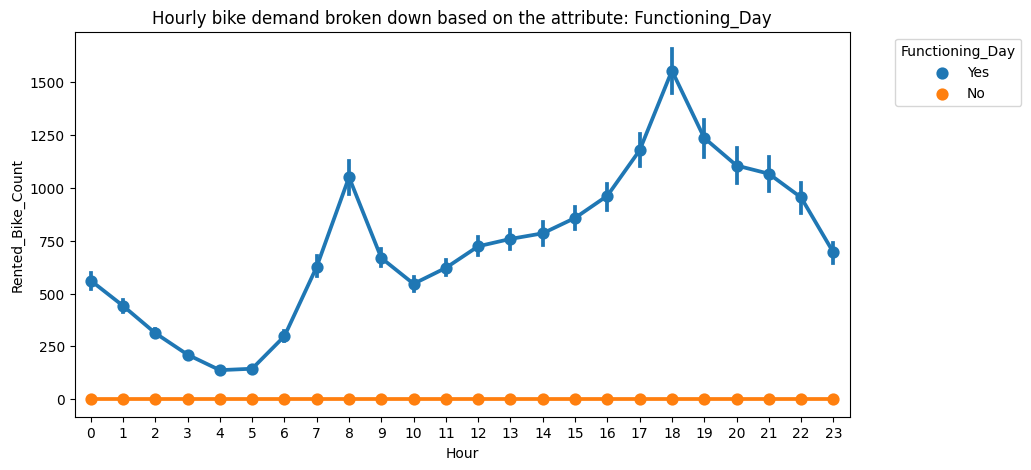

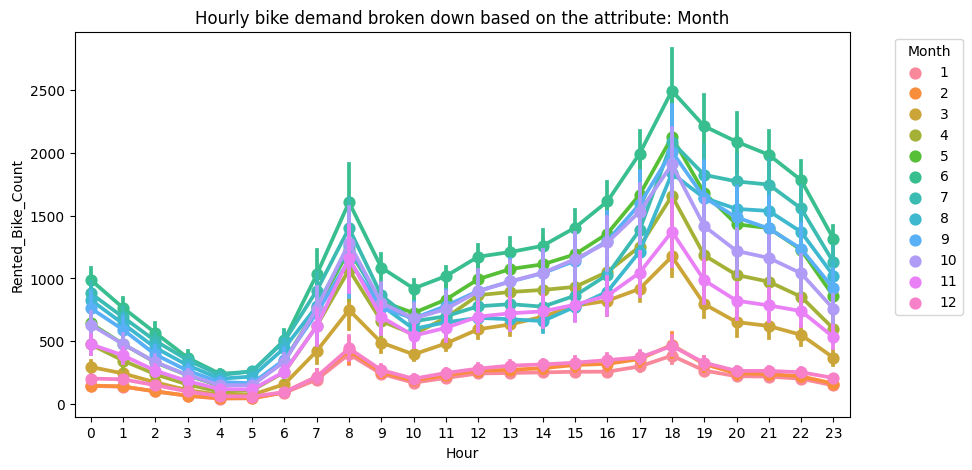

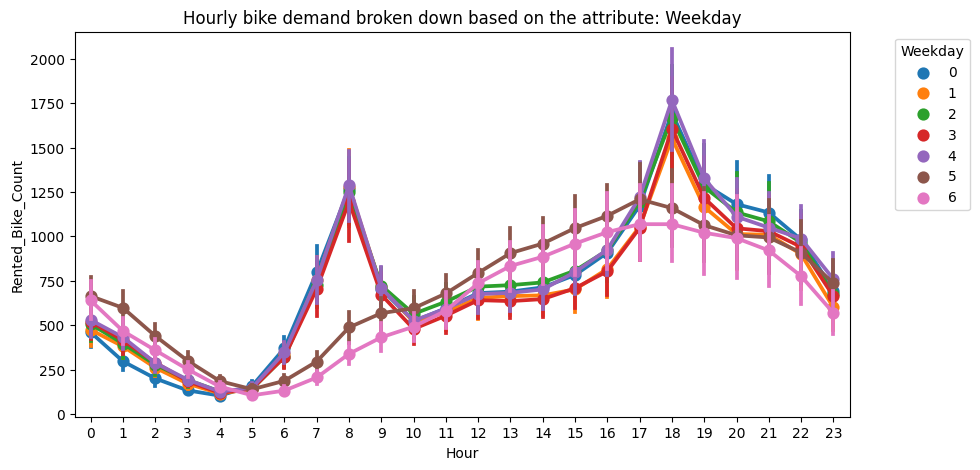

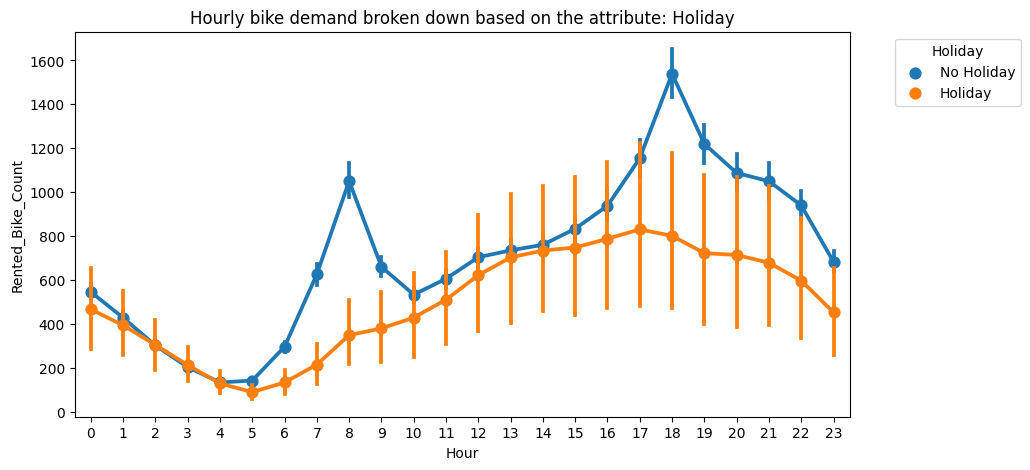

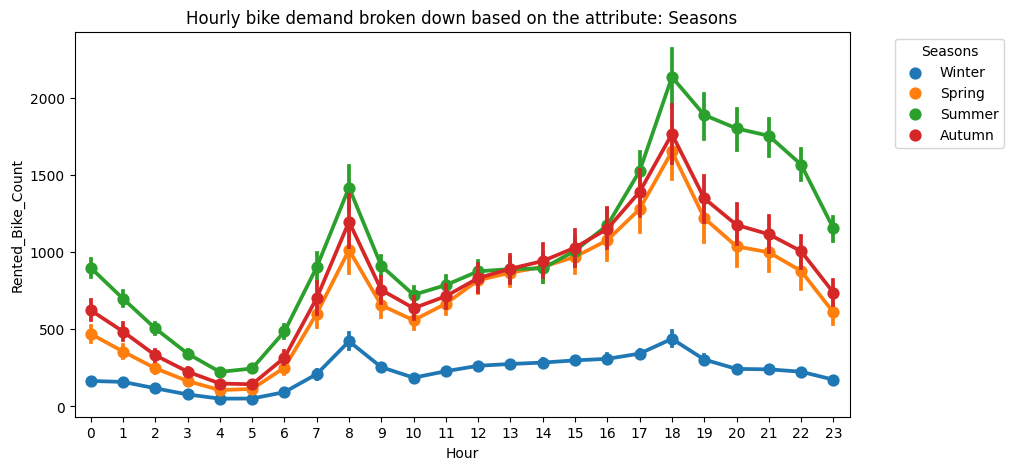

In [20]:
for i in categorical_features:
  if i == 'Hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

##### 1. Why did you pick the specific chart?

- This plot has been chosen to examine the number of rented bicycles during each hour of the day across various seasons, months, working days, and holidays.

##### 2. What is/are the insight(s) found from the chart?

  In all the charts, two distinct peaks were observed: one in the morning and another in the evening. These peaks correspond to the increased demand for bicycles during typical office hours.

  **1. Weekday**: Regarding weekdays, there are no peak days during the weekends, which is understandably due to the absence of office-goers.

  **2. Month:** When examining the data by month, a consistent daily trend is observed, but the demand varies between different months. Months 1, 11, and 12 exhibit the lowest demand.

  **3. Holiday**: On holidays, there are no discernible peaks in the data.

  **4. Seasons**: Across the seasons, a consistent trend is observed. Summer experiences the highest demand, while winter sees the lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The insights gained from the data analysis offer opportunities for positive business impact by optimizing resource allocation and understanding seasonal variations. However, the insights also highlight potential challenges during certain months and weekends that businesses need to address to ensure sustained growth and profitability.

### **Categorical features Analysis**

---



In [21]:
# function to draw barplot and boxplot
def categorical_plot(feat):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    sns.barplot(x = df[feat], y = df['Rented_Bike_Count'], ax =axs[0])
    axs[0].set_title(f'{feat} vs Rented Bike Count')

    sns.boxplot(x = df[feat], y = df['Rented_Bike_Count'], ax = axs[1])
    axs[1].set_title(f'{feat} vs Rented Bike Count')

    plt.show()


#### **Column: Functioning day**

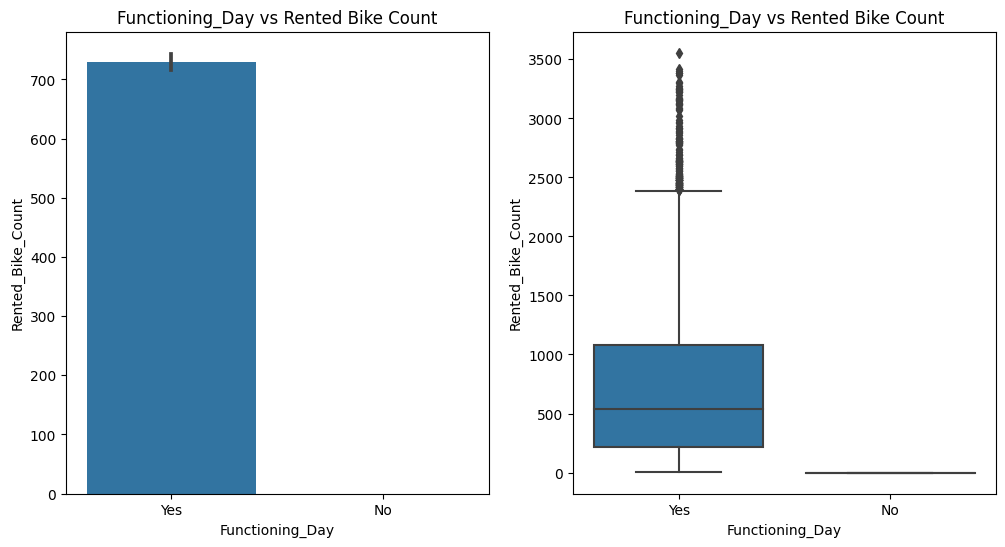

In [22]:
categorical_plot('Functioning_Day')

In [23]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

##### 1. Why did you pick the specific chart?

- This plot is picked to analyse relationship between the functioning day with rented bike count.


##### 2. What is/are the insight(s) found from the chart?

- There are very few Non functioning day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The Non functioning day can be utilised by company for Maintenance purpose.

#### **Column: Holiday**

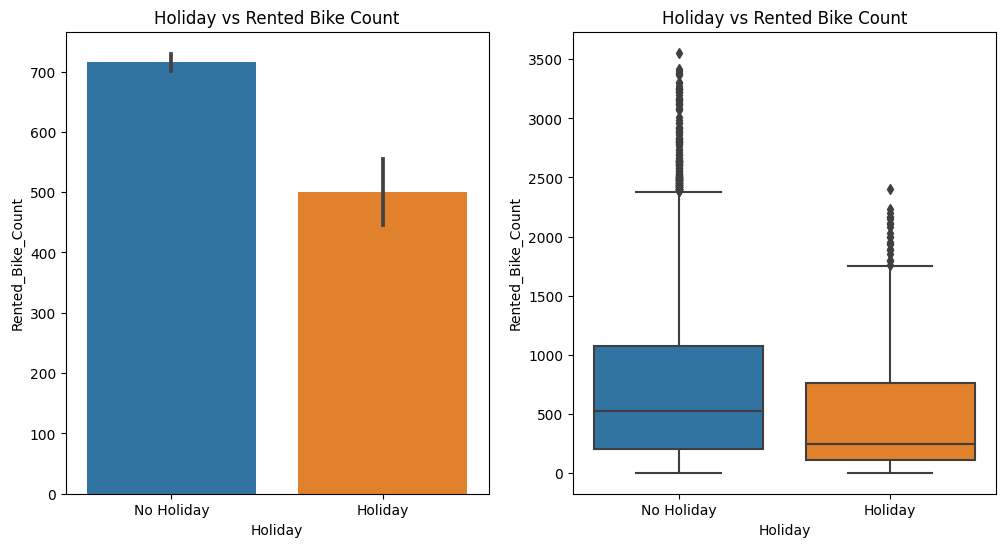

In [24]:
categorical_plot('Holiday')

##### 1. Why did you pick the specific chart?

- The barplot is pick to compare the rented bike count on holiday and non holiday.

##### 2. What is/are the insight(s) found from the chart?

- There are less rented bike count on holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- This insight proves advantageous for the business since it enables the allocation of resources based on demand.

#### **Column: Month**

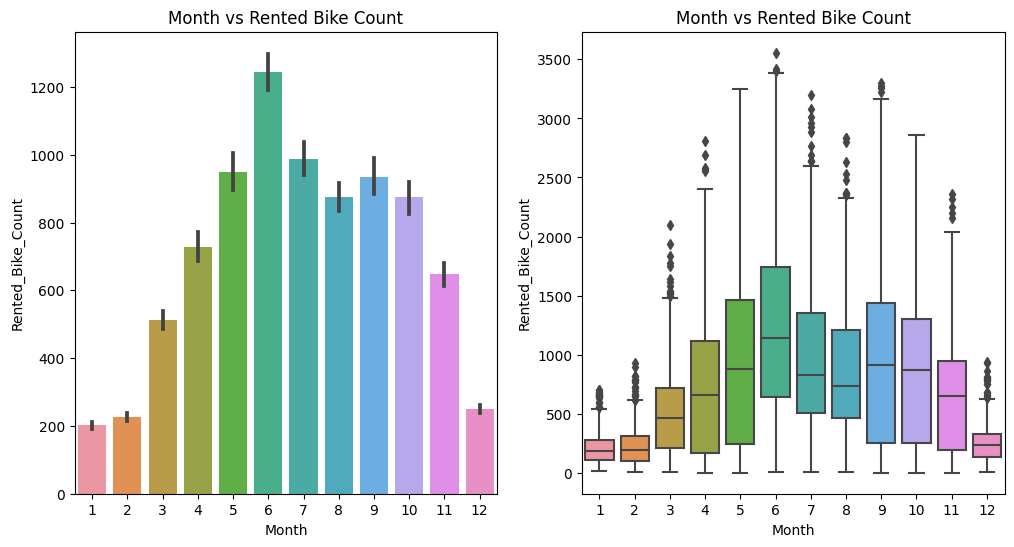

In [25]:
categorical_plot('Month')

##### 1. Why did you pick the specific chart?

- This plot is picked to compare the count of rented bike in different months.

##### 2. What is/are the insight(s) found from the chart?

- Highest booking: May
- Lowest booking: January

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Pricing strategies, resource allocation, and marketing strategies can be tailored according to the varying demand across different seasons.

#### **Column: Seasons**

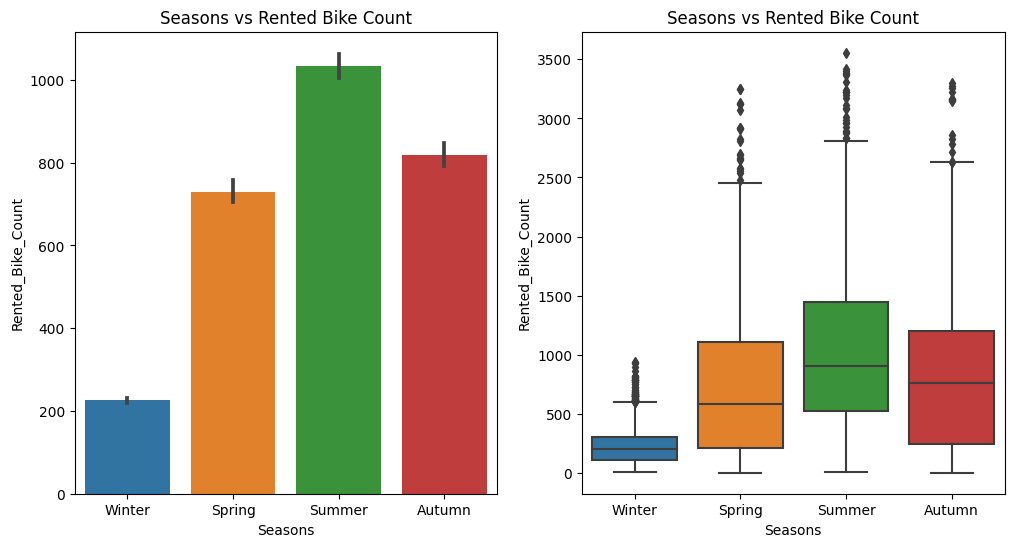

In [26]:
categorical_plot('Seasons')

##### 1. Why did you pick the specific chart?

- The bar plot is chosen to compare the variations in rented bike counts across various seasons.

##### 2. What is/are the insight(s) found from the chart?

- Summer has the highest demand and winter has the lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Pricing strategies, resource allocation, and marketing strategies can be tailored according to the varying demand across different seasons.

#### **Column: Weekday**

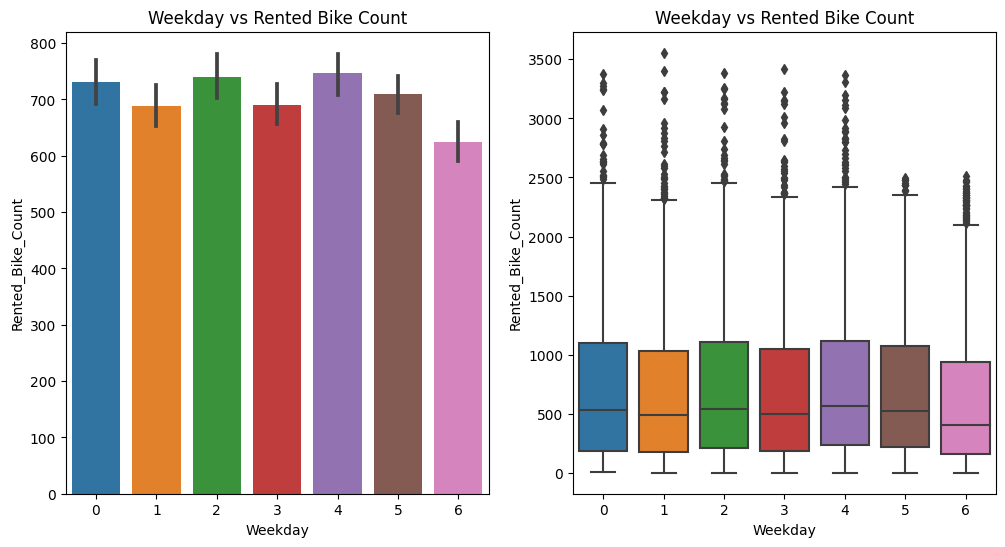

In [27]:
categorical_plot('Weekday')

##### 1. Why did you pick the specific chart?

- This plot is pick to compare the rented bike count within a week.

##### 2. What is/are the insight(s) found from the chart?

- Weekend has lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Business can utilise the low demand period to do the maintenance
work.

#### **Column: Hour**

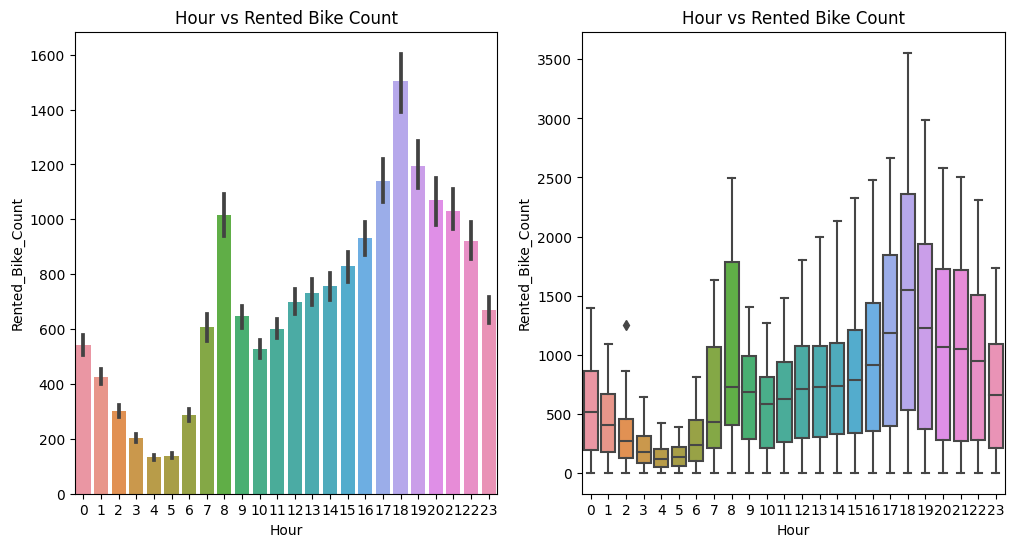

In [28]:
categorical_plot('Hour')

##### 1. Why did you pick the specific chart?

- This plot is to compare the demand of rented bike throughout a day.

##### 2. What is/are the insight(s) found from the chart?

- Highest demand: At 6 PM.
- Lowest demand: At 4 AM

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Businesses must guarantee an adequate bike supply during peak hours of the day, and pricing can be flexibly adapted to match demand fluctuations throughout different time periods.

### **Numerical features Analysis**

---



1. Check skewness: Distribution plot, boxplot and Q-Q plot  of each numerical feature.
2. Check linear relationship: scatter plot wrt dependent var to check colinear relation.

#### **Skewness**

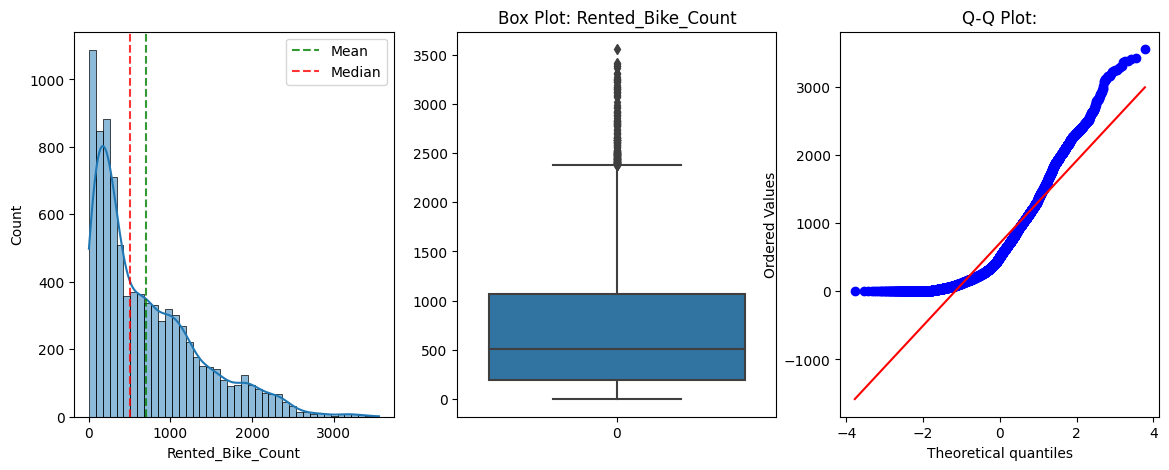

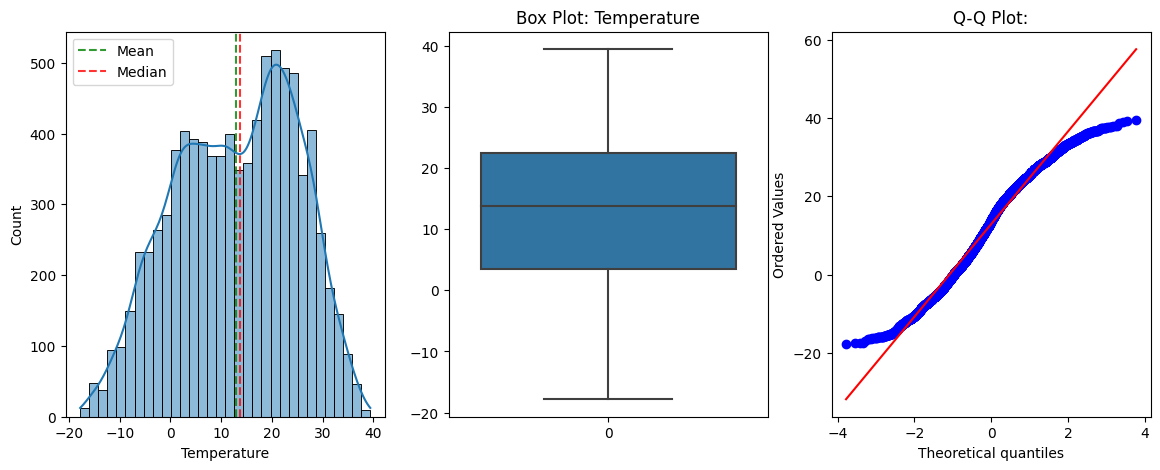

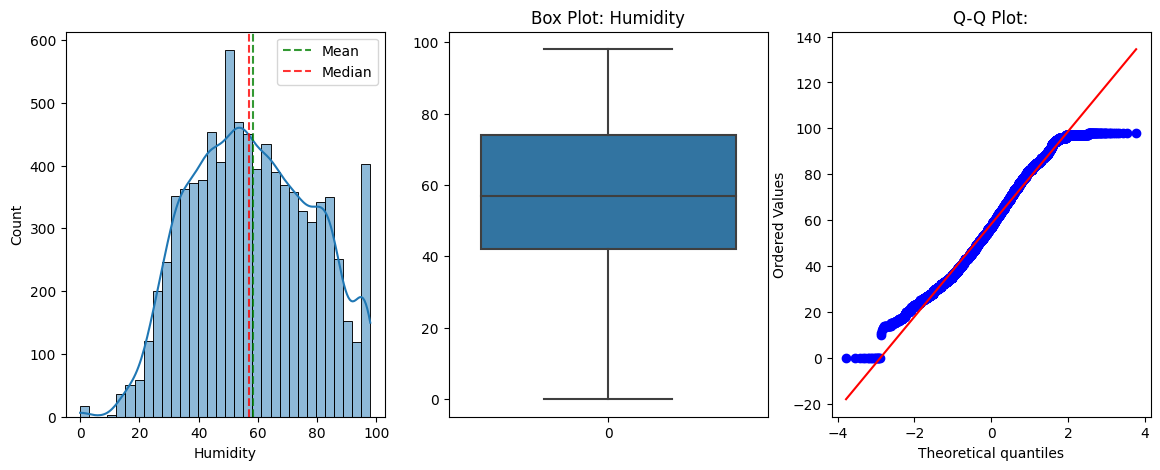

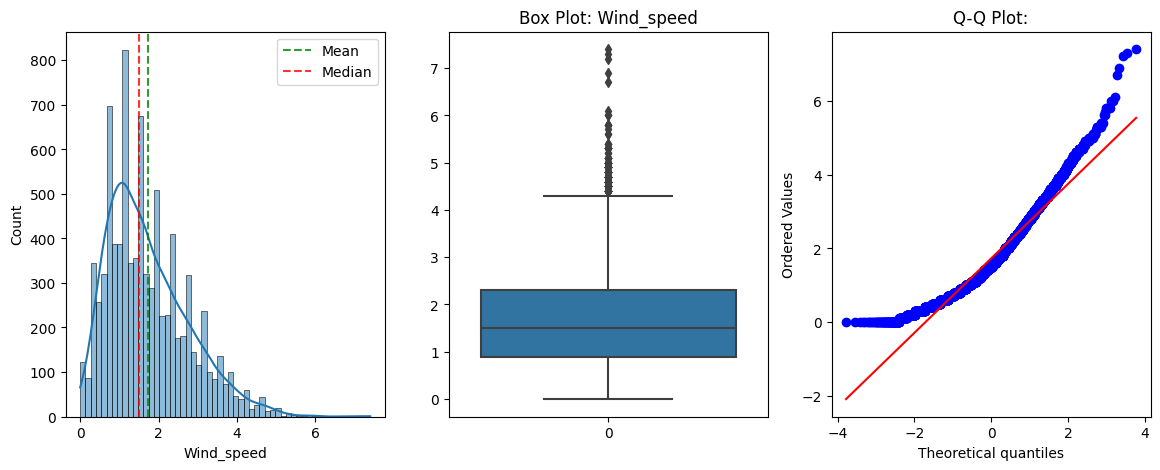

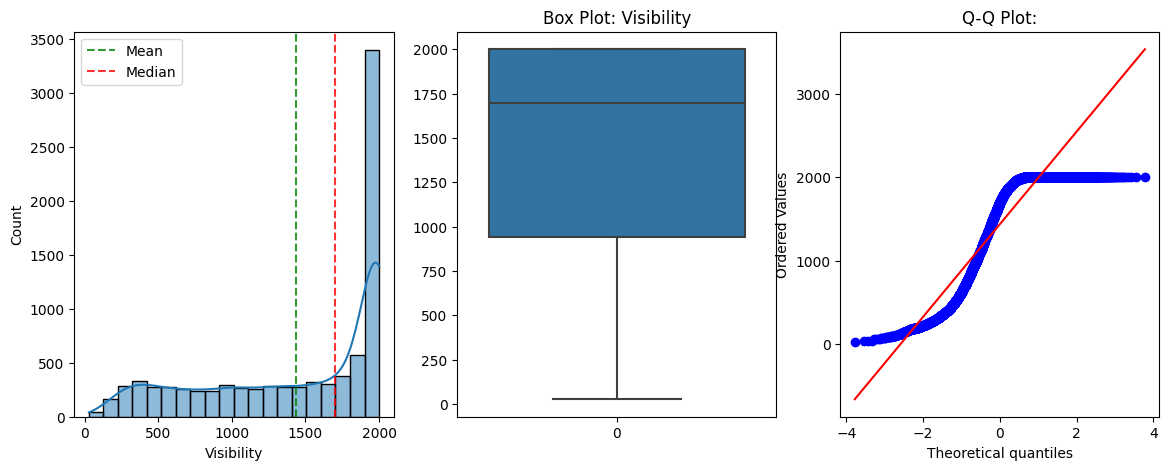

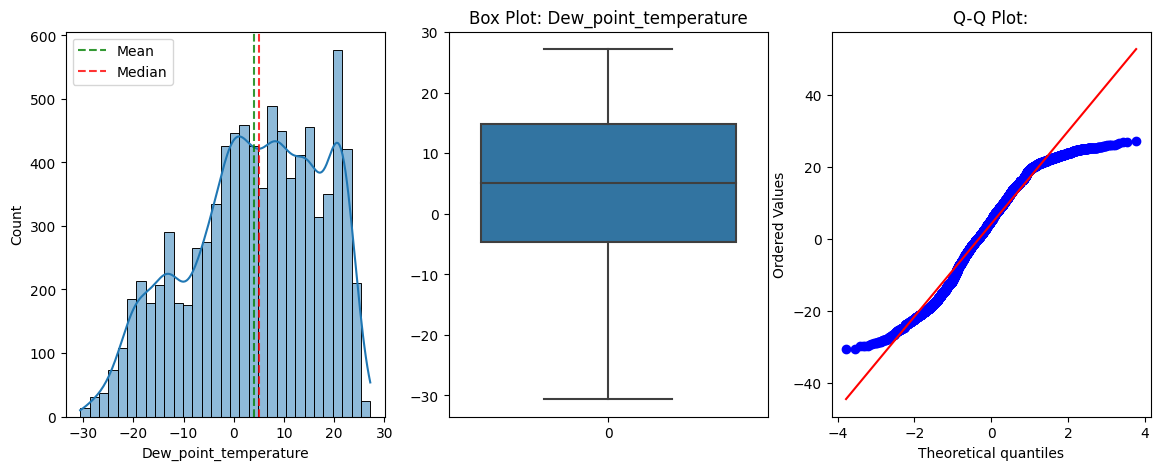

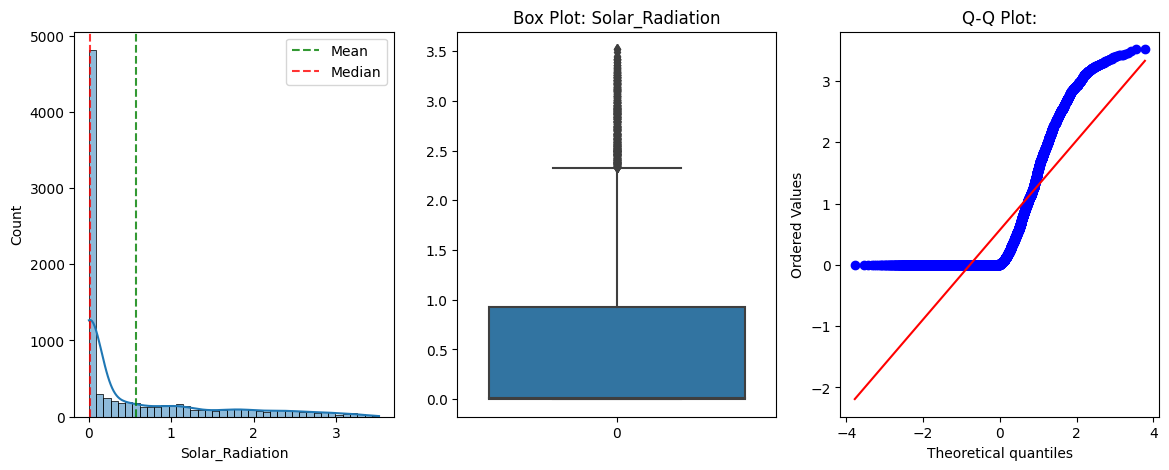

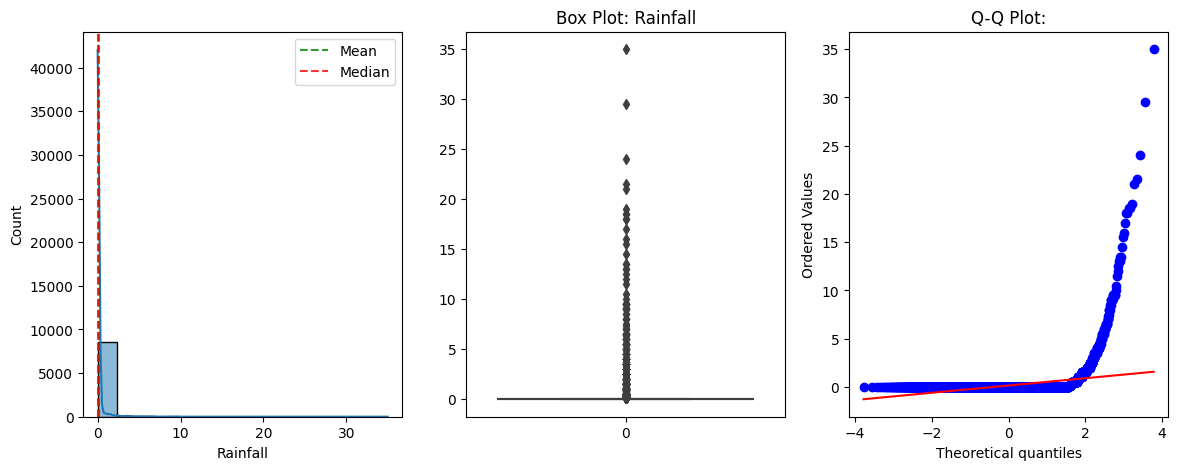

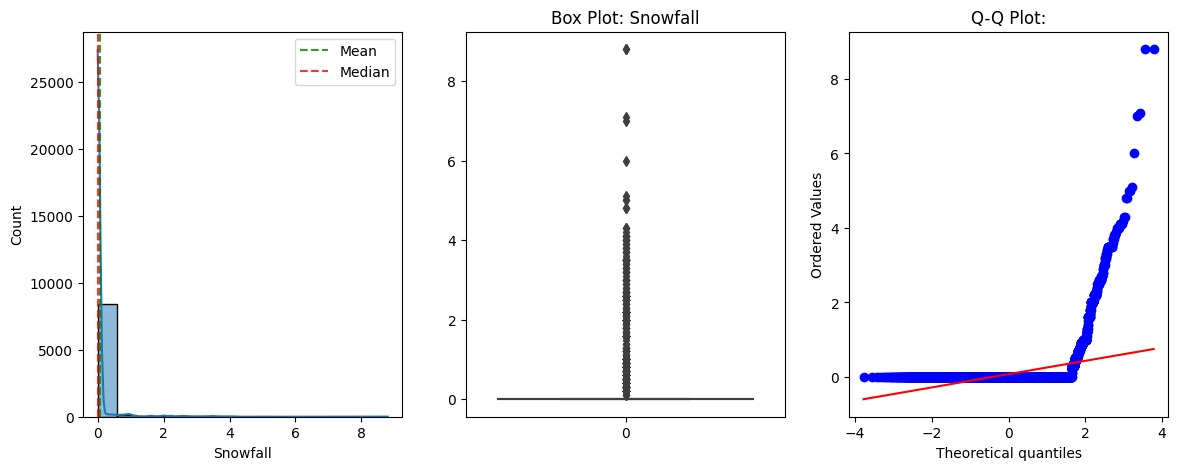

In [29]:
# Chart - 1 visualization code
for feat in numerical_features:

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5))

    # Subplot 1: Histogram
    sns.histplot(df[feat], kde = True, ax=axs[0])
    axs[0].axvline(df[feat].mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(df[feat].median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(df[feat], ax=axs[1])
    axs[1].set_title(f'Box Plot: {feat}')

    #Subplot 3: Q-Q plot
    stats.probplot(df[feat], plot = axs[2], dist="norm")
    # ax.get_lines()[2].set_markerfacecolor('g')
    axs[2].set_title('Q-Q Plot:')

    # Show the plot
    plt.show()

##### 1. Why did you pick the specific chart?

- These plots are picked to check which features follow normal distribution.
- QQ Plot: short for Quantile-Quantile plots, are graphical tools used for are often used to assess whether a dataset follows a normal distribution. When plotting the quantiles of the data against the quantiles of a normal distribution, a straight line indicates a good fit to a normal distribution, while deviations suggest departures from normality.

##### 2. What is/are the insight(s) found from the chart?

- **Normally Distributed**: Temperature and humidity.
- **Positively Skewed**: Rented bike count, Wind speed, Visibility, Solar radiation, Rainfall and Snowfall
- **Negatively Skewed**: Visibility.
- Snowfall and Rainfall both are highly skewed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Skewed data requires transformation to improve the performance of ML models.

#### **Regression Plot**

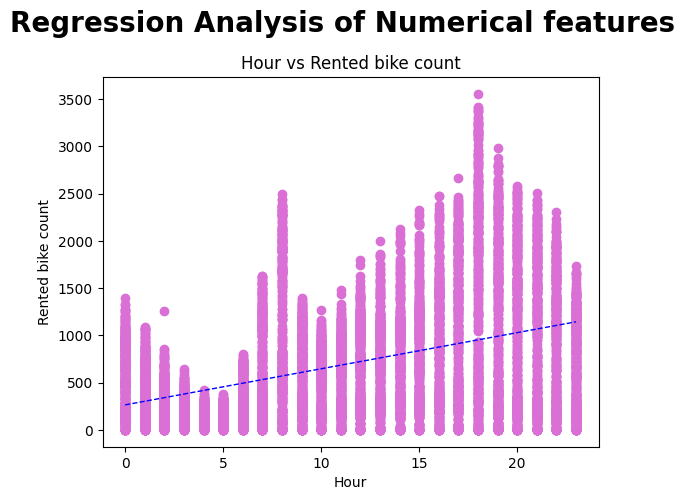

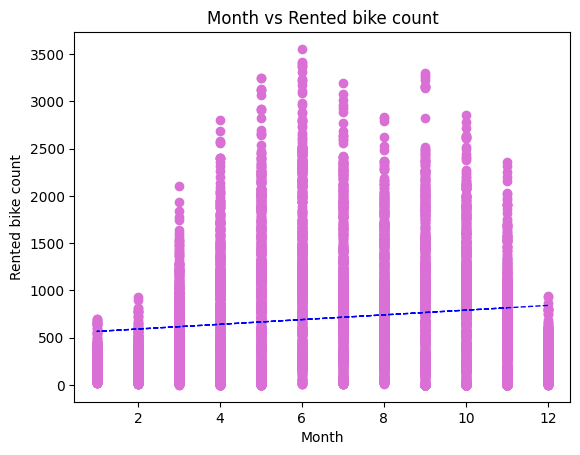

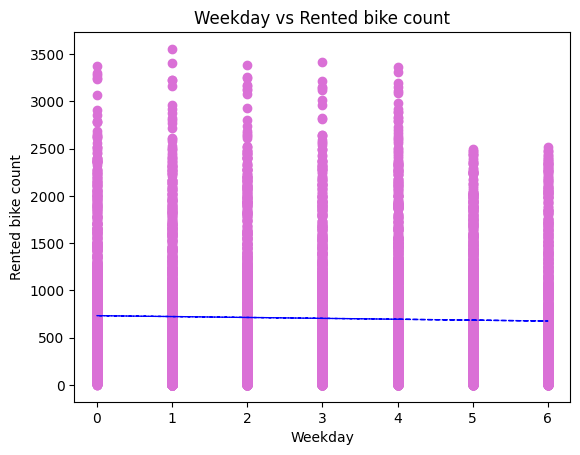

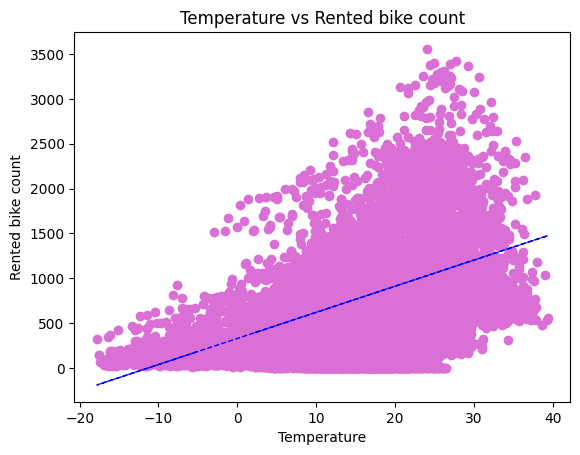

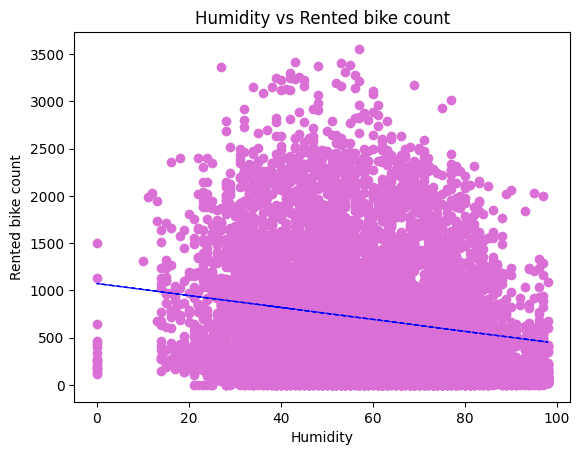

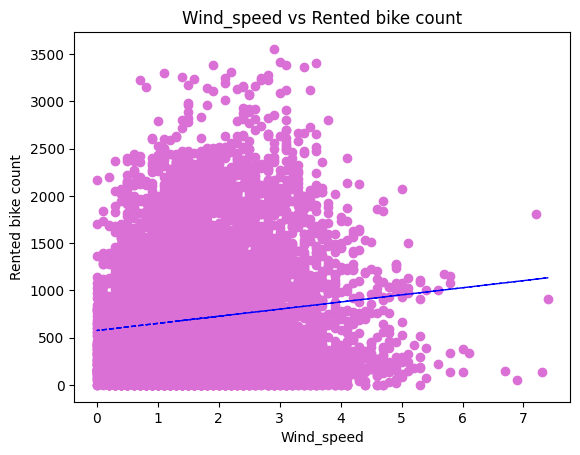

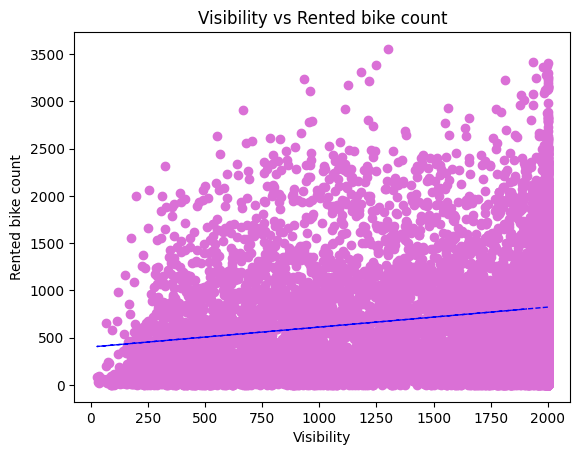

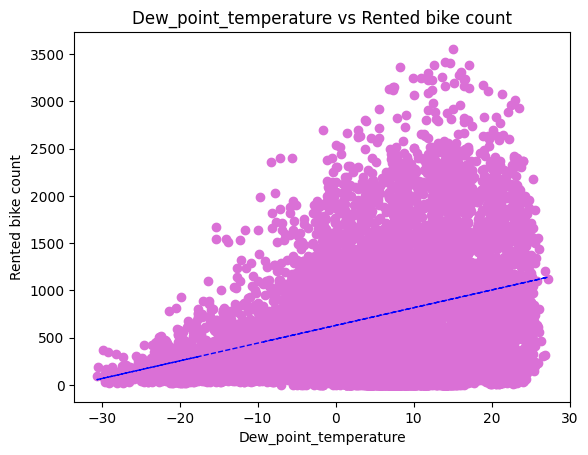

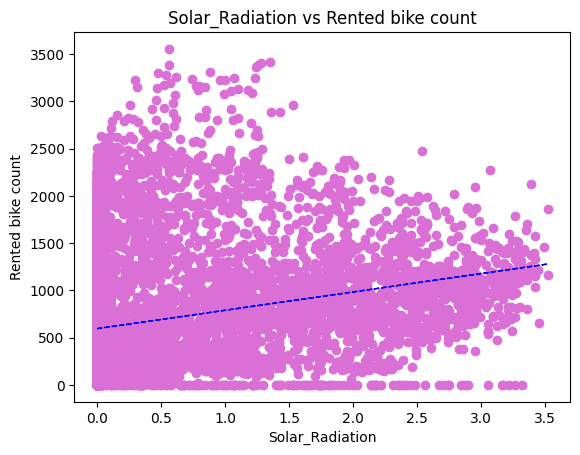

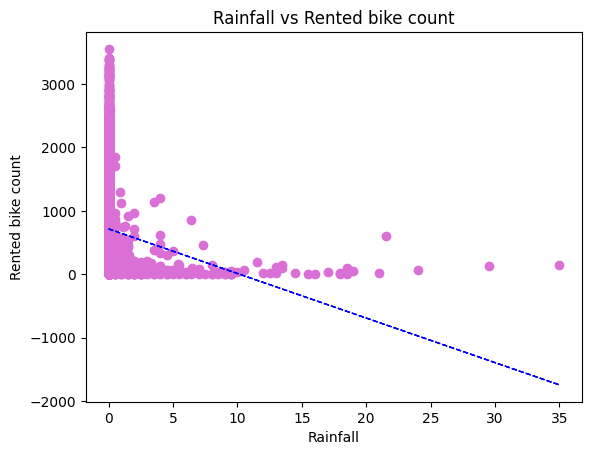

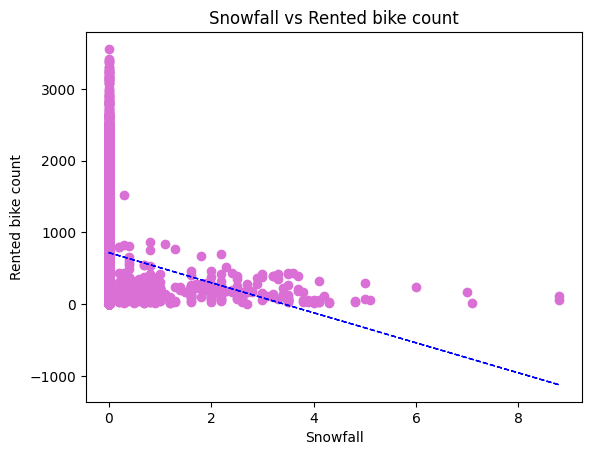

In [30]:
# Lets check the linear relationship with dependent variable. , alpha=0.5
columns = ['Hour', 'Month', 'Weekday']
features = columns + numerical_features

plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for feat in features:
  if feat != 'Rented_Bike_Count':
    # draw scatter plot
    plt.scatter(x = df[feat], y = df['Rented_Bike_Count'], color = 'orchid')
    plt.xlabel(feat)
    plt.ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    plt.plot(df[feat], y_hat, "b--", lw=1)

    # show plot
    plt.title(feat + ' vs ' + 'Rented bike count')
    plt.show()

##### 1. Why did you pick the specific chart?

- A regression plot used in statistics and data analysis to visualize the relationship between two or more variables.

##### 2. What is/are the insight(s) found from the chart?

- Most of the numerical features are positively correlated to our target variable.
- Humidity, Snowfall and Rainfall show negative correlation.

### **Correlation Heatmap**

<ipython-input-31-6c841a889961>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

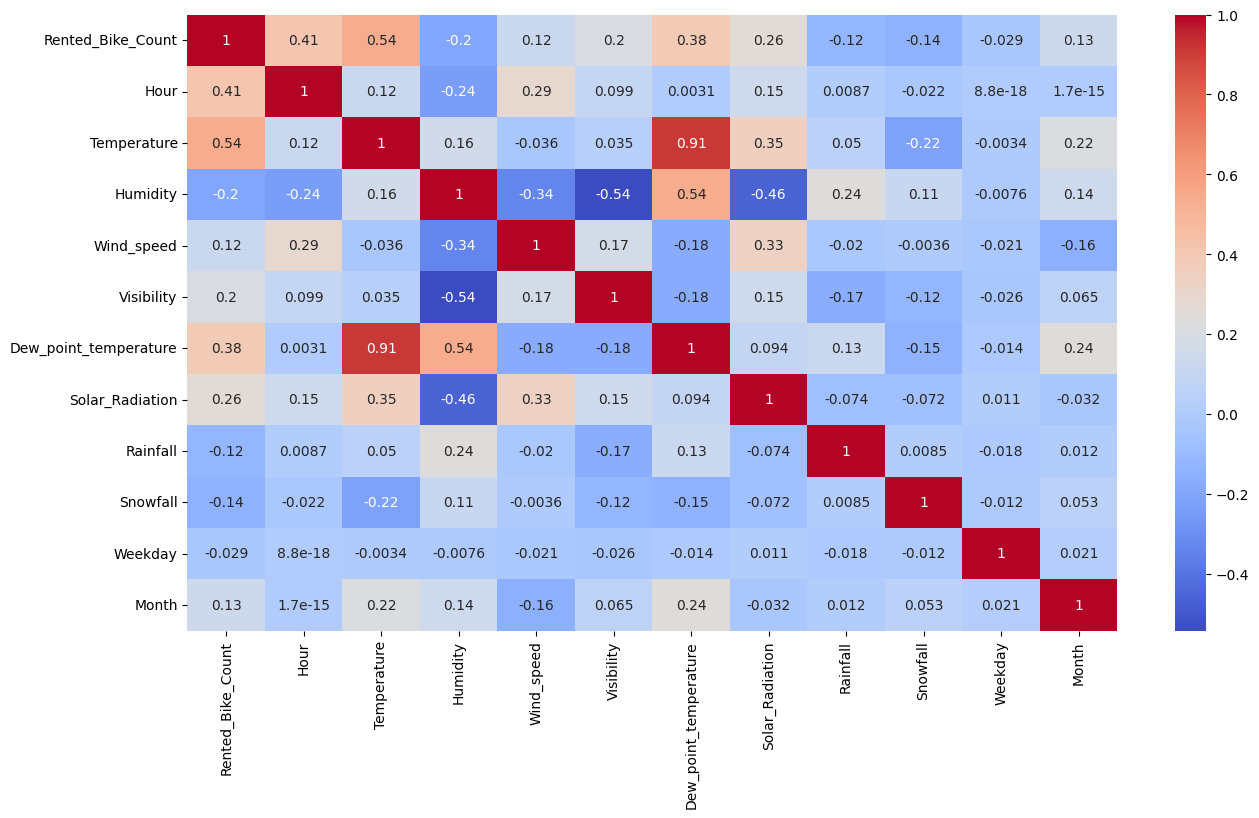

In [31]:
# Correlation Heatmap visualization code
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

- This plot is selected to determine the correlation between various features and the count of rented bikes, as well as to assess the correlations among the features themselves.

##### 2. What is/are the insight(s) found from the chart?

-  Rented bike count exhibits stronger correlations with the Hour and Temperature variables.
- Temperature is highly correlated with Dew point temperature.
- Weekday has no correlation with bike count so we can drop this column.


### **Pair Plot**

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde')

##### 1. Why did you pick the specific chart?

- Pair plot is picked to visually explore the relationships between multiple pairs of variables in a dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis (H0)**: There exists no notable association between the independent variables and the 'Rented Bike Count' (dependent variable).

**Alternative Hypothesis (Ha)**: A substantial connection exists between the independent variables and the 'Rented Bike Count' (dependent variable).

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
df_copy = df.copy()

# Add a constant column to the DataFrame for the intercept term
df_copy = sm.add_constant(df_copy)

independent_vars = df_copy[df_copy.describe().columns].drop('Rented_Bike_Count',axis=1)
dependent_var = df_copy['Rented_Bike_Count']

# Perform the regression analysis
model = sm.OLS(dependent_var,independent_vars)
results = model.fit()

# Obtain the p-values
p_values = results.pvalues

print(round(p_values,5))

In [ ]:
results.summary()

##### **Conclusion**

In [ ]:
df.columns

- The Visibility (p-value 0.22448), Dew_point_temperature (p-value 0.32270) and Snowfall (p-value 0.25089) which is higher than 0.05. This means we don't have enough evidence to say there's a strong relationship between Visibility, Dew Point Temperature, Snowfall and the 'Rented Bike Count.'

In summary, based on the provided p-values, we can dismiss the null hypothesis for the independent variables 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Solar_Radiation', 'Rainfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Weekday' and
       'Month'. This signifies that a meaningful relationship exists between these independent variables and the 'Rented Bike Count.' However, there is insufficient data to discard the null hypothesis for the 'Visibility', 'Dew_point_temperature' and 'Snowfall' variables, suggesting that these variables may not possess a significant connection with the 'Rented Bike Count.'







##### Which statistical test have you done to obtain P-Value?

To test this hypothesis, we can perform statistical tests such as:

**Feature Significance Test:** Analyze the p-values associated with the coefficients of the independent variables within the regression model. If these p-values fall below a predetermined significance threshold (e.g., 0.05), reject the null hypothesis and assert the presence of a meaningful relationship between the independent variables and the 'Rented Bike Count.'

**Overall Model Significance Test:** Evaluate the overall significance of the regression model through methods such as an F-test or chi-square test. If the resulting p-value is beneath the chosen significance level, reject the null hypothesis, and conclude that the model, as a whole, possesses significance in its ability to predict the 'Rented Bike Count.'

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** The dependent variable is normally distributed in the population.

**Alternative hypothesis (Ha):** The dependent variable is not normally distributed in the population.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(df_copy['Rented_Bike_Count'])

print("Shapiro-Wilk Test")
print("Test statistic:", statistic)
print("p-value:", p_value)


##### Which statistical test have you done to obtain P-Value?

Shapiro-Wilk test

##### **Conclusion**

Based on the Shapiro-Wilk test results, with a test statistic of 0.8822 and a p-value of 0.0, the p-value is less than the chosen significance level (e.g., 0.05). Therefore, we would reject the null hypothesis (H0) that the dependent variable is normally distributed.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# function to check skewnewss of dataset. It will draw three plots - Histogram, Boxplot and QQ plot
def skew_plot(y):

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4)

    # Subplot 1: Histogram
    sns.histplot(y, kde = True, ax=axs[0])
    axs[0].axvline(y.mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(y.median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(y, ax=axs[1])
    axs[1].set_title('boxplot')

    #Subplot 3: Q-Q plot
    stats.probplot(y, plot = axs[2], dist="norm")
    axs[2].set_title('Q-Q Plot')

    # Show the plot
    plt.show()

### 1. Handling Missing Values

- No missing values




In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

### 2. Handling Outliers

There are few columns but we will only remove outliers from wind speed columns.

In [ ]:
# Calculating upper whisker values of Outliers

def outlier_value(outlier_col):
    #Finding the inter-quartile range for the columns with outliers
    Q1 = df[outlier_col].quantile(0.25)
    Q3 = df[outlier_col].quantile(0.75)
    IQR = Q3-Q1
    IQR

    #Calculating the upper and lower whisker for outlier removal

    upper_whisker = Q3 + (1.5*IQR)
    lower_whisker = Q1 - (1.5*IQR)

    upper_outer_whisker = Q3 + (3*IQR)
    lower_outer_whisker = Q1 - (3*IQR)

    print('upper_whisker :\n', round(upper_whisker, 2),)
    print('upper_outer_whisker :\n', round(upper_outer_whisker, 2))

    return round(upper_whisker, 2), round(upper_outer_whisker, 2)

In [ ]:
feature = 'Wind_speed'
upper_whisker, upper_outer_whisker = outlier_value(feature)

In [ ]:
# Before removing outliers
skew_plot(df['Wind_speed'])

In [ ]:
# replacing all the values more than whisker with upper_whisker value
df.loc[df[feature]>= upper_whisker, 'Wind_speed'] = upper_whisker

In [ ]:
# After replacing outliers
skew_plot(df['Wind_speed'])

### 3. Categorical Encoding

There are few columns which are of categorical type and needs to do encoding.
1. Handle Functioning day
2. Handle Holiday
3. Handlie Seasons

##### 3.1 Encoding Columns Seasons

In [ ]:
# onehot encoding of seasons
one_hot_encoded = pd.get_dummies(df['Seasons'])
df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
# drop the column season
df = df.drop('Seasons', axis = 1)

##### 3.2 Encoding Columns Functioning day

In [ ]:
# Use map function to convert to numerical data type
conv_binary = {'Yes': 1, 'No': 0}
df['Functioning_Day'] = df['Functioning_Day'].map(conv_binary)

##### 3.3 Encoding Columns Holiday

In [ ]:
# encoding holiday column
df['Holiday'].unique()
conv_binary = {'Holiday': 1, 'No Holiday': 0}
df['Holiday'] = df['Holiday'].map(conv_binary)

##### What all categorical encoding techniques have you used & why did you use those techniques?

- Seasons: Onehot encoding is used to convert categorical columns since considering all seasons as of equal importance.
- Functioning day: Replace 'Yes' with 1 and 'No' with 0.
- Holiday: Replace 'Holiday' with 1, 'No Holiday' with 0



### 4. Multicolinearity

In [ ]:
df.head().T

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]

    return vif_data

if __name__ == "__main__":
    vif_result = calculate_vif(df)
    print(vif_result)

In [ ]:
df = df.drop('Dew_point_temperature', axis = 1)

In [ ]:
if __name__ == "__main__":
    vif_result = calculate_vif(df)
    print(vif_result)

### 5. Feature Manipulation & Selection


#### 5.1 Feature Selection

- We will remove the column Weekday as it is very less correlated to dependent variable.

In [ ]:
# Select your features wisely to avoid overfitting
df.drop('Weekday', axis = 1, inplace = True)
df.head().T

##### Which all features you found important and why?

- All other feature are important as they show correlation with dependent variable.

### 6. Data Transformation

**Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

In [ ]:
# this function will apply all transformation technique on variable and draw plot for each one of them
def test_transformation(feat):
    # plot 1 Withoutransformation
    y = df[feat]
    skew_plot(y)

    # plot 2 with log transformation
    print('log transformation')
    y = np.log10(df[feat])
    skew_plot(y)

    # plot 3 with squareroot transformation
    print('Square root transformation')
    y = np.sqrt(df[feat])
    skew_plot(y)

    # plot 4 with inversent transformation
    print('Inverse transformation')
    y = 1/(df[feat])
    skew_plot(y)

##### **6.1 Rented bike count**

In [ ]:
feat = 'Rented_Bike_Count'
test_transformation(feat)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

- Rented_bike_count: Square root transformation.
- We have used square root transformation for the regression as it transformed the variable into a well-distributed form.

In [ ]:
# Transform Your data

### 7. Data Splitting

In [ ]:
X = df.iloc[:, 1:]
y = np.sqrt(df['Rented_Bike_Count'])

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

What data splitting ratio have you used and why?

- We have used 0.2 splitting ratio. That means 80% of the data is used for training and 20% of the data is used for testing the model.

### 8. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling your data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

##### Import all libraries

In [ ]:
# import all libraries related to ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##### Creating a evaluation metrics function

In [ ]:
# Visualizing evaluation Metric Score chart
# creating a list which will contain the scores of all the models.
result = []

# function
def eval_metrics(model, model_name, X_train, X_test):

    # Predict on the model
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_pred_original = np.power(train_pred, 2)
    test_pred_original = np.power(test_pred, 2)

    # train_score = model.score(X_train, y_train)
    # test_score = model.score(X_test, y_test)
    # print('train_score : ', train_score)
    # print('test_score : ', test_score, '\n')

    # MSE
    MSE_train  = round(mean_squared_error(y_train, train_pred), 4)
    MSE_test  = round(mean_squared_error(y_test, test_pred), 4)
    print("MSE_train :" , MSE_train)
    print("MSE_test :" , MSE_test, '\n')

    #RMSE
    RMSE_train = round(np.sqrt(MSE_train), 4)
    RMSE_test = round(np.sqrt(MSE_test), 4)
    print("RMSE train :" ,RMSE_train)
    print("RMSE test :" ,RMSE_test, '\n')

    # MAE
    MAE_train  = round(mean_absolute_error(y_train, train_pred), 4)
    MAE_test  = round(mean_absolute_error(y_test, test_pred), 4)
    print("MAE_train :" , MAE_train)
    print("MAE_test :" , MAE_test, '\n')

    #r2_score
    r2_train = round(r2_score(y_train, train_pred), 4)
    r2_test = round(r2_score(y_test, test_pred), 4)
    print("R2 score train :" ,r2_train)
    print("R2 score test :" ,r2_test, '\n')

    #Adjusted R2
    r2_adjusted_train = round(1-(1-r2_score(y_train, train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)), 4)
    r2_adjusted_test = round(1-(1-r2_score(y_test, test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)), 4)
    print("Adjusted R2 score train :" ,r2_adjusted_train)
    print("Adjusted R2 score test :" ,r2_adjusted_test, '\n')

    # Plots
    # subplot 1 --> actual vs predicted on test data
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig.subplots_adjust(hspace=0.4)
    axs[0].plot((test_pred)[:20], color ="limegreen")
    axs[0].plot(np.array((y_test)[:20]), color ="magenta")
    axs[0].legend(["Predicted","Actual"])
    axs[0].set_xlabel('Test Data on last 20 points')
    axs[0].set_title('Actual vs Predicted values')


    # subplot 2
    sns.kdeplot((y_test- test_pred),fill=True, color ="limegreen", ax = axs[1])
    axs[1].set_title('Residual Analysis')

    # append all the scores in this model.
    result.append({'model':model_name,
                       'train MSE':MSE_train,
                       'test MSE':MSE_test,
                       'train RMSE':RMSE_train,
                       'test RMSE':RMSE_test,
                       'train MAE':MAE_train,
                       'test MAE':MAE_test,
                       'train R2':r2_train,
                       'test R2':r2_test,
                       'train Adj R2':r2_adjusted_train,
                       'test Adj R2':r2_adjusted_test})

plt.show()

##### Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- **Mean squared error (MSE)**:- It tells you how close a regression line is to a set of points.

- **Root Mean Square Error (RMSE)**:- It is the standard deviation of the residuals (prediction errors).

- **Mean Absolute Error (MAE)**:- These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

- **R-squared (R2)**:- It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

### **7.1 Linear regression**

In [ ]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr_model = lr.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- The core idea behind linear regression is to find the best-fitting linear relationship (a straight line) between the independent variables and the dependent variable. This relationship is represented by a linear equation.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(lr_model, 'Linear_regression' ,X_train, X_test)

### **7.2 Polynomial regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features with degree=2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In linear regression, we assume that the relationship between the variables is linear, meaning that a change in the independent variable(s) results in a proportional change in the dependent variable. However, in many real-world situations, this assumption may not hold, and the relationship may exhibit curvature or non-linearity.

Polynomial regression addresses this by fitting a polynomial equation to the data. The general form of a polynomial regression equation of degree n.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(model, 'Polynomial regression' ,X_train_poly, X_test_poly)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes, There is some improvement in the R2 score as compared to the linear regression with degree 1.

### **7.3 Lasso**

In [ ]:
# lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

# fit the model
lasso_model = lasso.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Lasso regression extends linear regression by adding a regularization term to the linear regression objective function. The goal of lasso regression is to find the best-fitting linear model that minimizes the sum of squared differences between predicted and actual values (similar to linear regression), while also penalizing the absolute values of the regression coefficients. This penalty term encourages some of the coefficients to be exactly equal to zero, effectively performing feature selection by excluding some features from the model.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(lasso_model, 'Lasso', X_train, X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(lasso_regressor, 'Lasso_optimised', X_train, X_test)

##### Which hyperparameter optimization technique have you used and why?

- GridSearchCV is employed to identify the most optimal hyperparameters for the machine learning model mentioned earlier.
It helps in improving the model performance, automation of hyperparameter tuning, cross-validation and prevention of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- No, There is no improvement in the evaluation metric score after cross-validation.
- Also, The model shows better metric score in Polynomial regression.

### **7.4 Ridge**

In [ ]:
# Visualizing evaluation Metric Score chart
ridge = Ridge()
ridge.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Ridge regression is a linear regression technique that extends ordinary least squares (OLS) regression by adding a regularization term to the linear regression objective function. This regularization term, also known as L2 regularization, helps prevent overfitting and stabilizes the regression model when there are multicollinearity issues among the predictor variables.

In [ ]:
eval_metrics(ridge, 'Ridge' ,X_train, X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train, y_train)

In [ ]:
eval_metrics(ridge_regressor, 'Ridge_optimised' ,X_train, X_test)

##### Which hyperparameter optimization technique have you used and why?

- GridSearchCV is employed to identify the most optimal hyperparameters for the machine learning model mentioned earlier.
It helps in improving the model performance, automation of hyperparameter tuning, cross-validation and prevention of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- No, There is no improvement after cross-validation and hyperparameter tuning.
- Metric score is same as lasso regression.

### **7.5 Elasticnet**

In [ ]:

#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

elasticnet.fit(X_train,y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Elastic Net regression is a linear regression technique that combines the features of both Ridge regression and Lasso regression. It is used for regression tasks where the goal is to predict a continuous numeric target variable based on one or more input features. Elastic Net introduces both L1 (Lasso) and L2 (Ridge) regularization terms into the linear regression objective function, offering a balance between the two.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(elasticnet, 'Elasticnet' ,X_train, X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
         'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}

elastic_regressor = GridSearchCV(elastic, param, cv = 5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)


In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(elastic_regressor, 'Elasticnet_optimised' ,X_train, X_test)

##### Which hyperparameter optimization technique have you used and why?

- GridSearchCV is employed to identify the most optimal hyperparameters for the machine learning model mentioned earlier.
It helps in improving the model performance, automation of hyperparameter tuning, cross-validation and prevention of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes, there is slight improvement in the metric score after hyperparameter optimization.
- However, it is not the best score till now. Other ML model have shown better result.

### **Tree based algorithm**

---



### **7.6 Decision tree regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_leaf_nodes=15, random_state = 20)
dtree.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- In decision tree regression, a decision tree is constructed to model the relationship between the features and the target variable. The decision tree is a hierarchical structure consisting of nodes and branches, where each internal node represents a decision based on a feature, and each leaf node (terminal node) represents a predicted numeric value.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(dtree, 'Decision_tree' ,X_train, X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dtree = DecisionTreeRegressor()
params = {'max_leaf_nodes': [None, 10 , 20, 30],
          'max_depth': [None, 5, 7, 10, 20, 30],}

tree_regressor = GridSearchCV(dtree, params, cv = 5)

# Fit the Algorithm
tree_regressor.fit(X_train, y_train)

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(tree_regressor, 'Decision_tree_optimised' ,X_train, X_test)

In [ ]:
best_params = tree_regressor.best_params_
best_params

##### Which hyperparameter optimization technique have you used and why?

- GridSearchCV is employed to identify the most optimal hyperparameters for the machine learning model mentioned earlier.
It helps in improving the model performance, automation of hyperparameter tuning, cross-validation and prevention of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes, there is a significant improvement in the Evaluation metric Score after hyperparameter optimization.
- Decision tree has shown the best results in all the above ML models.

### **7.7 Random forest**

In [ ]:
# Create a Random Forest Regressor object with optional hyperparameters
rf_regressor = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1    # Minimum number of samples required to be at a leaf node
    # You can include other hyperparameters as needed
)

# Fit the Random Forest Regressor to the training data
rf_regressor.fit(X_train, y_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Random Forest regression is an ensemble machine learning technique that extends the concept of decision tree regression. It is designed for regression tasks, where the goal is to predict a continuous numeric target variable based on one or more input features. Random Forest regression builds multiple decision trees and combines their predictions to achieve higher predictive accuracy and reduced overfitting compared to a single decision tree.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(rf_regressor, 'Random_forest' ,X_train, X_test)

In [ ]:
# Access other information about the trained model, such as feature importances
feature_importances = rf_regressor.feature_importances_
print("Feature Importances:", feature_importances)


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_regressor = RandomForestRegressor(random_state=42)

# Define hyperparameters and their respective values to search
param_grid = {
    'n_estimators': [70, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with the Random Forest Regressor and parameter grid
rf_grid = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1)  # n_jobs This setting instructs scikit-learn to use all available CPU cores on your machine for parallel processing.

# Fit the GridSearchCV to your data
rf_grid.fit(X, y)



In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(rf_grid, 'Random_forest_optimised' ,X_train, X_test)

In [ ]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", rf_grid.best_params_)
print("Best Score: ", rf_grid.best_score_)

# Access the best trained model
best_rf_model = rf_grid.best_estimator_


##### Which hyperparameter optimization technique have you used and why?

- GridSearchCV is employed to identify the most optimal hyperparameters for the machine learning model mentioned earlier.
It helps in improving the model performance, automation of hyperparameter tuning, cross-validation and prevention of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- No, the model has not improved the performance after optimisation.
- Without hyperparameter optimization technique it was performing good.

##### **Model Explainability**

In [ ]:
# finding importanct feature
feature_importances = best_rf_model.feature_importances_

# creating a dictionary containing feature importace
model_exp = {'Feature' : list(X.columns),
            'Feature_Importance' : feature_importances}

# creating a dataframe
model_explain = pd.DataFrame(model_exp)
sorted_model = model_explain.sort_values(by=['Feature_Importance'], ascending= False)
sorted_model

In [ ]:
# Plot the above
sns.barplot(data = sorted_model, y = 'Feature', x ='Feature_Importance')
plt.title('Feature importance')
plt.show()

### **7.8 XGBoost**

In [ ]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,      # Number of boosting rounds (trees)
    max_depth=3,           # Maximum depth of each tree
    learning_rate=0.1,     # Step size shrinkage to prevent overfitting
    objective='reg:squarederror'  # Regression objective function
    # You can include other hyperparameters as needed
)

# Fit the XGBoost Regressor to the training data
xgb_regressor.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- XGBoost is an ensemble learning technique, which means it combines the predictions of multiple weak learners (typically decision trees) to create a strong predictive model. It builds a sequence of decision trees, each one correcting the errors of the previous trees.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(xgb_regressor, 'XGBoost' ,X_train, X_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create an XGBoost Regressor object
xgb_regressor = xgb.XGBRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5],                   # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage to prevent overfitting
    'objective': ['reg:squarederror']         # Regression objective function
    # Add other hyperparameters and their ranges as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)


In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new XGBoost Regressor with the best hyperparameters
best_xgb_regressor = xgb.XGBRegressor(**best_params)

# Fit the best model to the training data
best_xgb_regressor.fit(X_train, y_train)

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(best_xgb_regressor, 'XGBoost_optimised' ,X_train, X_test)

##### Which hyperparameter optimization technique have you used and why?

- GridSearchCV is employed to identify the most optimal hyperparameters for the machine learning model mentioned earlier.
It helps in improving the model performance, automation of hyperparameter tuning, cross-validation and prevention of overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

- Yes, There is significant improvement after hyperparameter optimization.
- The XGBoost ML model has produced the best result among all models.

#### **Model Explainability**

In [ ]:
# finding importanct feature
feature_importances = best_xgb_regressor.feature_importances_

# creating a dictionary containing feature importace
model_exp = {'Feature' : list(X.columns),
            'Feature_Importance' : feature_importances}

# creating a dataframe
model_explain = pd.DataFrame(model_exp)
sorted_model = model_explain.sort_values(by=['Feature_Importance'], ascending= False)
sorted_model

In [ ]:
# Plot the above
sns.barplot(data = sorted_model, y = 'Feature', x ='Feature_Importance')
plt.title('Feature importance')
plt.show()

### **7.9 Model Results**

In [ ]:
result_df = pd.DataFrame(result)
result_df.sort_values(by = 'test R2', ascending = False)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

- **The R2 (R-squared) score, also known as the coefficient of determination, is considered as evaluation metric. It is a widely used metric to evaluate how well a regression model fits the observed data. It quantifies the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in the model.**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- **XGBoost regressor is selected for the prediction of bike count. The reasons for selection of this model is that the train and test accuracy is highest in XGBoost.**


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (Extreme Gradient Boosting) is a popular and powerful ensemble machine learning algorithm known for its exceptional performance and versatility. It offers several advantages, making it a preferred choice for various machine learning tasks. Here are some of the key advantages of XGBoost:
1. High Predictive Accuracy
2. Robust to Overfitting
3. Efficiency
4. Parallel Processing
5. Feature Importance

#### Model Explainability

In [ ]:
# finding importanct feature
feature_importances = best_xgb_regressor.feature_importances_

# creating a dictionary containing feature importace
model_exp = {'Feature' : list(X.columns),
            'Feature_Importance' : feature_importances}

# creating a dataframe
model_explain = pd.DataFrame(model_exp)
sorted_model = model_explain.sort_values(by=['Feature_Importance'], ascending= False)
sorted_model

In [ ]:
# Plot the above
sns.barplot(data = sorted_model, y = 'Feature', x ='Feature_Importance')
plt.title('Feature importance')
plt.show()

# **Conclusion**

We have opted for the XGBoost model as our top choice. Our primary focus is on achieving improved predictions for the "rented_bike_count,". Consequently, we have explored a range of models, including linear models, decision trees, Random Forests, and Gradient Boosting techniques, to enhance predictive accuracy. To make our selection, we conducted a comparison based on the R-squared (R2) metric.

Predicting bike rental counts can offer several benefits to a bike rental business:
- Optimized Inventory Management
- Resource Allocation
- Improved Customer Experience
- Pricing Strategies
- Marketing and Promotions
- Seasonal Planning
- Maintenance Scheduling

Following conclusion have been deduced from the dataset:
- On Non-Holidays, There is high demand at 8AM and 6 PM (during work hours)
- On Holidays, There is no peak during the day.
- Highest booking in the month of May and Lowest booking in January.
- Highest booking in the Summer and Lowest booking in Winter.
- Non Functioning day can be utilised for maintanence purpose as there is less booking.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***